### Importing

In [38]:
#Importing everything
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

sns.set_palette("copper")

In [2]:
#load dataset
df = pd.read_csv(os.path.join( "..", "data", "df.csv"))
#this dataset was cleaned in practice notebook

In [3]:
#loading 5 rows of dataset
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_calls,total_charges
0,128,415,no,yes,25,265,110,45,197,99,16,244,91,11,10,3,2,1,False,716,303,74
1,107,415,no,yes,26,161,123,27,195,103,16,254,103,11,13,3,3,1,False,623,332,57
2,137,415,no,no,0,243,114,41,121,110,10,162,104,7,12,5,3,0,False,538,333,61
3,84,408,yes,no,0,299,71,50,61,88,5,196,89,8,6,7,1,2,False,562,255,64
4,75,415,yes,no,0,166,113,28,148,122,12,186,121,8,10,3,2,3,False,510,359,50


In [4]:
# Split the predictor and target variables
y = df['churn']
X = df.drop(columns='churn')

In [5]:
X = pd.get_dummies(X)
X.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charges,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,415,25,265,110,45,197,99,16,244,91,11,10,3,2,1,716,303,74,1,0,0,1
1,107,415,26,161,123,27,195,103,16,254,103,11,13,3,3,1,623,332,57,1,0,0,1
2,137,415,0,243,114,41,121,110,10,162,104,7,12,5,3,0,538,333,61,1,0,1,0
3,84,408,0,299,71,50,61,88,5,196,89,8,6,7,1,2,562,255,64,0,1,1,0
4,75,415,0,166,113,28,148,122,12,186,121,8,10,3,2,3,510,359,50,0,1,1,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   area_code               3333 non-null   int64
 2   number_vmail_messages   3333 non-null   int64
 3   total_day_minutes       3333 non-null   int64
 4   total_day_calls         3333 non-null   int64
 5   total_day_charge        3333 non-null   int64
 6   total_eve_minutes       3333 non-null   int64
 7   total_eve_calls         3333 non-null   int64
 8   total_eve_charge        3333 non-null   int64
 9   total_night_minutes     3333 non-null   int64
 10  total_night_calls       3333 non-null   int64
 11  total_night_charge      3333 non-null   int64
 12  total_intl_minutes      3333 non-null   int64
 13  total_intl_calls        3333 non-null   int64
 14  total_intl_charge       3333 non-null   int64
 15  customer_service_call

### Model1 ▶ Gaussian Naive Bayes

In [7]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
# Build a pipeline with StandardScaler and KNeighborsClassifier
gau = Pipeline([('ss', StandardScaler()), 
                ('gau', GaussianNB())])

In [67]:
#fitting the model
gau_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('gau', GaussianNB())])

In [68]:
#cross validating
cross_val_score(gau_pipeline, X, y, cv=5)

array([0.87106447, 0.85007496, 0.89655172, 0.89189189, 0.87837838])

In [53]:
#getting f1 score
gau_y_pred = gau_pipeline.predict(X_test)
f1_score(y_test, gau_y_pred, average='micro')

0.8764988009592326

###### visualization
plot_confusion_matrix(gau_pipeline, X_test, y_test, cmap='copper')
plt.title('Gaussian Naive Bayes')

#### ◆Evaluation

### Model2 ▶ K Nearest Neighbors Classifier

In [55]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charges,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,-1.404508,-0.512381,-0.584700,-1.879070,1.330852,-1.861348,1.038819,0.401340,1.028293,1.078487,0.004940,1.071623,2.916438,-0.595235,2.149741,-0.427903,0.156986,0.969919,-0.816341,0.327448,-0.327448,0.611418,-0.611418
1,0.366388,-0.512381,-0.584700,0.285727,0.529165,0.315051,0.525204,0.401340,0.563314,2.219379,0.670832,2.372880,1.135097,-1.417963,0.891908,0.324616,1.766780,0.824133,1.103964,0.327448,-0.327448,0.611418,-0.611418
2,0.518179,-0.679077,1.685101,1.062833,-1.875896,1.076790,0.090606,0.849774,0.098336,-0.082075,-0.763398,-0.229634,0.066292,0.227493,-0.365924,1.829653,0.648868,-1.012762,0.911934,0.327448,-0.327448,-1.635543,1.635543
3,2.010792,-0.512381,-0.584700,-0.676405,1.681590,-0.664328,-0.403255,0.650470,-0.366643,-0.318121,-0.660953,-0.229634,0.066292,-0.183871,-0.365924,-0.427903,-0.815597,0.969919,-0.816341,0.327448,-0.327448,0.611418,-0.611418
4,0.290493,1.749923,-0.584700,0.489255,1.080325,0.532691,-0.719326,-0.296224,-0.831621,-1.183625,0.056162,-1.097138,0.778829,1.050221,0.891908,1.077134,-0.759702,0.561720,-0.048219,0.327448,-0.327448,0.611418,-0.611418


In [56]:
# Instantiate KNeighborsClassifier
KNN = KNeighborsClassifier()

# Fit the classifier
KNN.fit(scaled_data_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier()

In [58]:
# Print the accuracy on test set
KNN.score(scaled_data_test, y_test)

0.8908872901678657

In [60]:
# Build a pipeline with StandardScaler and KNeighborsClassifier
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('KNN', KNeighborsClassifier())])

In [61]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
scaled_pipeline_1.score(X_test, y_test)

0.8908872901678657

Text(0.5, 1.0, 'KNN Classification')

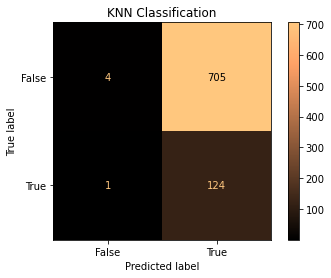

In [74]:
# Import plot_confusion_matrix
plot_confusion_matrix(KNN, X_test, y_test, cmap='copper')
plt.title('KNN Classification')

◆Evaluation

### Model3 ▶ Random Forest Classifier

In [80]:
rfc = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

In [81]:
# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [82]:
# Define a grid search
gridsearch = GridSearchCV(estimator=rfc, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [83]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.9532374100719424

In [85]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_calls,total_charges
0,128,415,no,yes,25,265,110,45,197,99,16,244,91,11,10,3,2,1,False,716,303,74
1,107,415,no,yes,26,161,123,27,195,103,16,254,103,11,13,3,3,1,False,623,332,57
2,137,415,no,no,0,243,114,41,121,110,10,162,104,7,12,5,3,0,False,538,333,61
3,84,408,yes,no,0,299,71,50,61,88,5,196,89,8,6,7,1,2,False,562,255,64
4,75,415,yes,no,0,166,113,28,148,122,12,186,121,8,10,3,2,3,False,510,359,50


In [86]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[692  17]
 [100  25]]


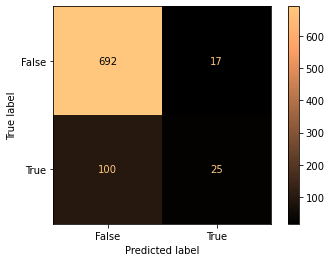

In [88]:
# Import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.copper)
plt.show()